# Differentiation in Python: Symbolic, Numerical and Automatic

In [1]:
import numpy as np

## 1 - Functions in Python

This is just a reminder how to define functions in Python. A simple function $f\left(x\right) = x^2$, it can be set up as:

In [2]:
def f(x):
    return x**2

print(f(3))

9


You can easily find the derivative of this function analytically. You can set it up as a separate function:

In [3]:
def dfdx(x):
    return 2*x

print(dfdx(3))

6


Since you have been working with the `NumPy` arrays, you can apply the function to each element of an array:

In [4]:
x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


Now you can apply those functions `f` and `dfdx` to an array of a larger size. The following code will plot function and its derivative (you don't have to understand the details of the `plot_f1_and_f2` function at this stage):

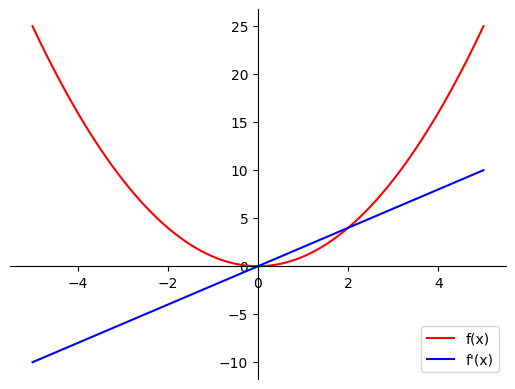

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.        
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()
    
plot_f1_and_f2(f, dfdx)

In real life the functions are more complicated and it is not possible to calculate the derivatives analytically every time. Let's explore which tools and libraries are available in Python for the computation of derivatives without manual derivation.

## 2 - Symbolic Differentiation

**Symbolic computation** deals with the computation of mathematical objects that are represented exactly, not approximately (e.g. $\sqrt{2}$ will be written as it is, not as $1.41421356237$). For differentiation it would mean that the output will be somehow similar to if you were computing derivatives by hand using rules (analytically). Thus, symbolic differentiation can produce exact derivatives.

### 2.1 - Introduction to Symbolic Computation with `SymPy`

Let's explore symbolic differentiation in Python with commonly used `SymPy` library.

If you want to compute the approximate decimal value of $\sqrt{18}$, you could normally do it in the following way:

In [7]:
import math

math.sqrt(18)

4.242640687119285

The output $4.242640687119285$ is an approximate result. You may recall that $\sqrt{18} = \sqrt{9 \cdot 2} = 3\sqrt{2}$ and see that it is pretty much impossible to deduct it from the approximate result. But with the symbolic computation systems the roots are not approximated with a decimal number but rather only simplified, so the output is exact:

In [8]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

Numerical evaluation of the result is available, and you can set number of the digits to show in the approximated output:

In [9]:
N(sqrt(18),8)

4.2426407

In `SymPy` variables are defined using **symbols**. In this particular library they need to be predefined (a list of them should be provided). Have a look in the cell below, how the symbolic expression, correspoinding to the mathematical expression $2x^2 - xy$, is defined:

In [10]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

Now you can perform various manipulations with this expression: add or subtract some terms, multiply by other expressions etc., just like if you were doing it by hands:

In [11]:
expr_manip = x * (expr + x * y + x**3)
expr_manip

x*(x**3 + 2*x**2)

You can also expand the expression:

In [12]:
expand(expr_manip)

x**4 + 2*x**3

Or factorise it:

In [13]:
factor(expr_manip)

x**3*(x + 2)

To substitute particular values for the variables in the expression, you can use the following code:

In [14]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

This can be used to evaluate a function $f\left(x\right) = x^2$:

In [15]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

You might be wondering now, is it possible to evaluate the symbolic functions for each element of the array? At the beginning of the lab you have defined a `NumPy` array `x_array`:

In [16]:
print(x_array)

[1 2 3]


Now try to evaluate function `f_symb` for each element of the array. You will get an error:

In [17]:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


It is possible to evaluate the symbolic functions for each element of the array, but you need to make a function `NumPy`-friendly first:

In [18]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, 'numpy')

In [19]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


### 2.2 - Symbolic Differentiation with `SymPy`

Let's try to find a derivative of a simple power function using `SymPy`:

In [20]:
diff(x**3,x)

3*x**2

Some standard functions can be used in the expression, and `SymPy` will apply required rules (sum, product, chain) to calculate the derivative:

In [21]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

Now calculate the derivative of the function `f_symb` defined in [2.1](#2.1) and make it `NumPy`-friendly:

In [22]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

Evaluate function `dfdx_symb_numpy` for each element of the `x_array`:

In [23]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

x: 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


You can apply symbolically defined functions to the arrays of larger size. The following code will plot function and its derivative, you can see that it works:

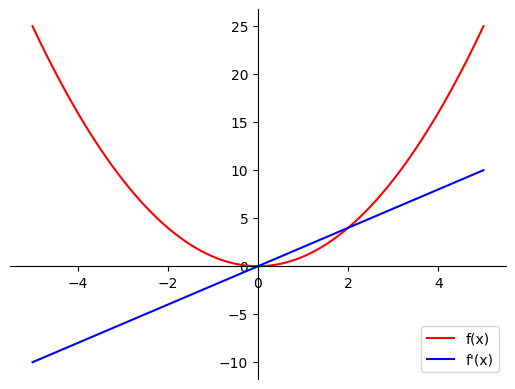

In [24]:
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

### 2.3 - Limitations of Symbolic Differentiation

Symbolic Differentiation seems to be a great tool. But it also has some limitations. Sometimes the output expressions are too complicated and even not possible to evaluate. For example, find the derivative of the function $$\left|x\right| = \begin{cases} x, \ \text{if}\ x > 0\\  -x, \ \text{if}\ x < 0 \\ 0, \ \text{if}\ x = 0\end{cases}$$ Analytically, its derivative is:
$$\frac{d}{dx}\left(\left|x\right|\right) = \begin{cases} 1, \ \text{if}\ x > 0\\  -1, \ \text{if}\ x < 0\\\ \text{does not exist}, \ \text{if}\ x = 0\end{cases}$$

Have a look the output from the symbolic differentiation:

In [25]:
dfdx_abs = diff(abs(x),x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

Looks complicated, but it would not be a problem if it was possible to evaluate. But check, that for $x=-2$ instead of the derivative value $-1$ it outputs some unevaluated expression:

In [26]:
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

And in the `NumPy` friendly version it also will give an error:

In [ ]:
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

In fact, there are problems with the evaluation of the symbolic expressions wherever there is a "jump" in the derivative (e.g. function expressions are different for different intervals of $x$), like it happens with $\frac{d}{dx}\left(\left|x\right|\right)$. 

Also, you can see in this example, that you can get a very complicated function as an output of symbolic computation. This is called **expression swell**, which results in unefficiently slow computations. You will see the example of that below after learning other differentiation libraries in Python.